In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

import json
import os
import re
import torch

from collections import Counter, defaultdict
from itertools import islice

%matplotlib inline

In [11]:
def get_results(
                version:str='train',
                model:str='linear',
                task_setting:str='single',
):
    subdir = './results_train/' + model + '/' + task_setting + '/'  if version == 'train' else './results_test/'
    all_files = list(map(lambda f: subdir + f, os.listdir(subdir)))
    all_results = defaultdict(dict)
    for file in all_files: #islice(all_files, 1, None):
        if not re.search(r'.ipynb_checkpoints', file):
            with open(file) as f:
                r = json.load(f)
                for metric, values in r.items():
                    all_results[file][metric] = values
    return dict(all_results)

  
def plot_results(results:dict,
                 metric:str,
                 model:str,
                 task_setting:str,
                 iv:str='datasets',
                 correlation:bool=False,
):
    r_plot = {}
    for clf, r in results.items():
        for m, v in r.items():
            if re.search(r'' + metric, m):
                r_plot[clf] = v
    
    #if iv == 'optims':
    #    params = ['AdamW', 'Adam', 'SGDCos', 'SGD']
    if iv == 'datasets':
        params = ['$D_o \cup D_s$', '$D_o$', '$D_s$']
    
    if re.search(r'batch_loss', metric):
        plt.figure(figsize=(10, 6), dpi=100)
    
    for idx, (clf, met) in enumerate(r_plot.items()):
        plt.plot(range(1, len(met) + 1), met, '-o', label=params[idx])
    
    if re.search(r'acc', metric): 
        plt.ylabel('Exact-match', fontsize=12)
    
    elif re.search(r'f1', metric):
        plt.ylabel('F1', fontsize=12)
    
    elif re.search(r'loss', metric):
        plt.yticks(range(1, 7))
        plt.ylabel('Loss', fontsize=12)
    
    plt.xlabel('Evaluation steps', fontsize=12) 
    plt.legend(fancybox=True, shadow=True)
    plt.savefig('./plots/' + 'models/' + model + '/' + task_setting + '/ '+ metric + '.png')
    plt.show()

In [21]:
# define general hyperparameters
iv = 'datasets'
version = 'train'
task_setting ='single'
metrics = ['batch_loss', 'batch_acc', 'batch_f1', 'val_f1', 'val_acc', 'val_loss']
models = ['linear', 'highway', 'recurrent']

In [22]:
# load results
all_results = get_results(version=version, model=model, task_setting=task_setting)

------------------------------
------- Model: LINEAR --------
------------------------------

-------------------------------
------- Metric: BATCH_LOSS --------
------------------------------


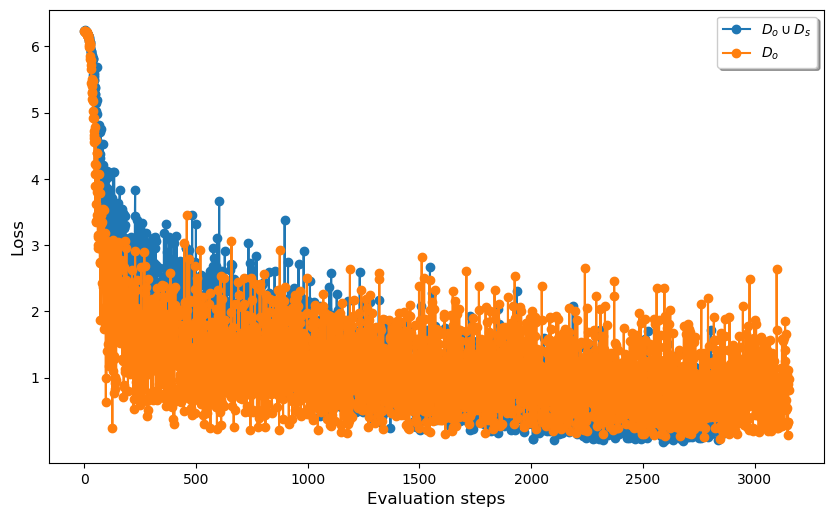

-------------------------------
------- Metric: BATCH_ACC --------
------------------------------


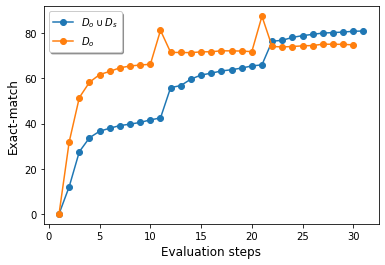

-------------------------------
------- Metric: BATCH_F1 --------
------------------------------


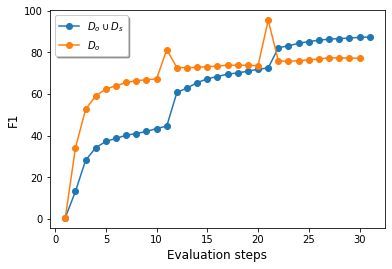

-------------------------------
------- Metric: VAL_F1 --------
------------------------------


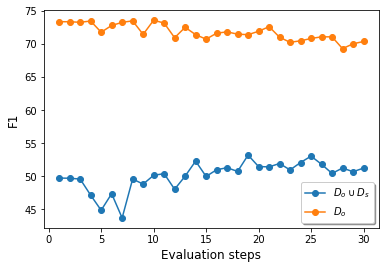

-------------------------------
------- Metric: VAL_ACC --------
------------------------------


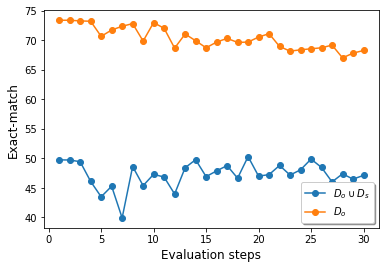

-------------------------------
------- Metric: VAL_LOSS --------
------------------------------


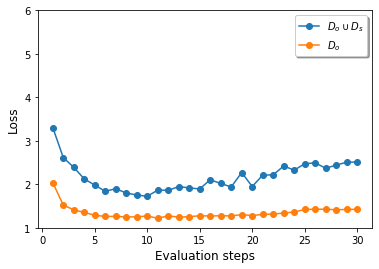

------------------------------
------- Model: HIGHWAY --------
------------------------------

-------------------------------
------- Metric: BATCH_LOSS --------
------------------------------


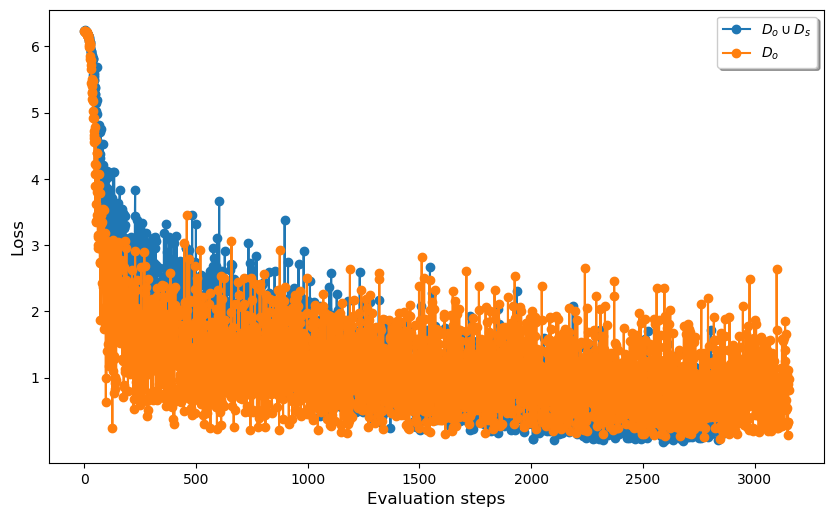

-------------------------------
------- Metric: BATCH_ACC --------
------------------------------


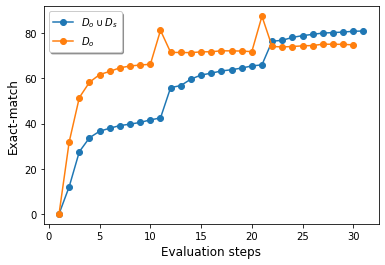

-------------------------------
------- Metric: BATCH_F1 --------
------------------------------


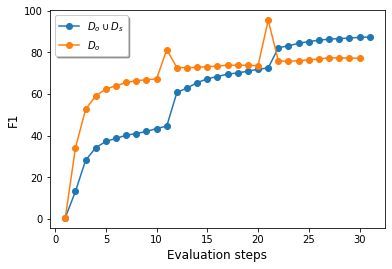

-------------------------------
------- Metric: VAL_F1 --------
------------------------------


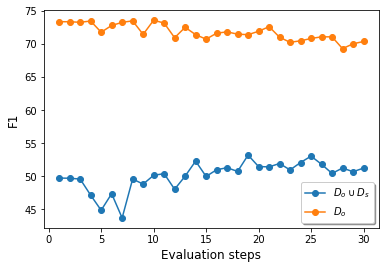

-------------------------------
------- Metric: VAL_ACC --------
------------------------------


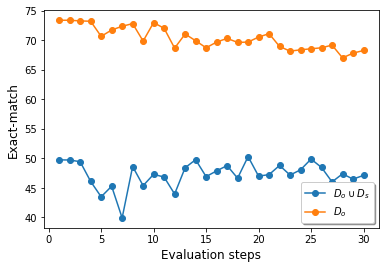

-------------------------------
------- Metric: VAL_LOSS --------
------------------------------


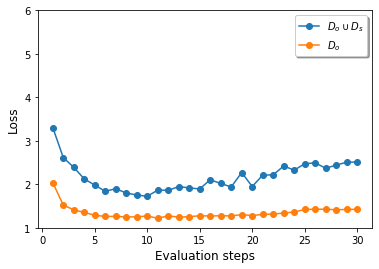

------------------------------
------- Model: RECURRENT --------
------------------------------

-------------------------------
------- Metric: BATCH_LOSS --------
------------------------------


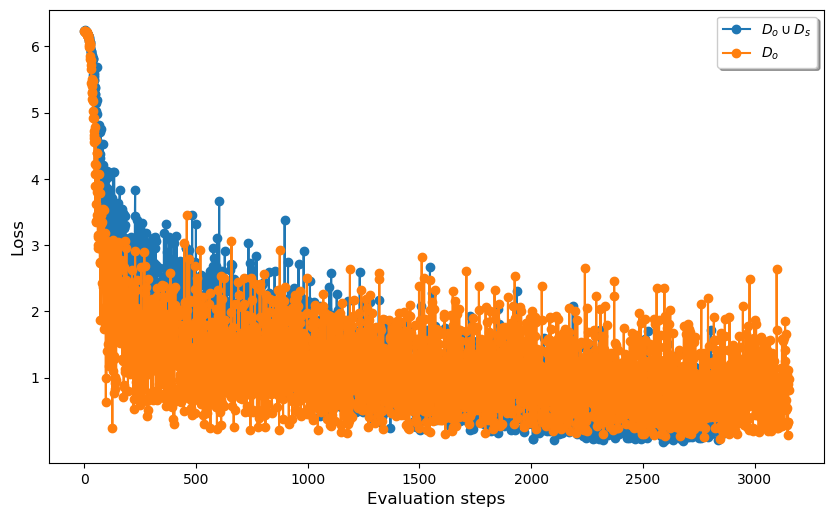

-------------------------------
------- Metric: BATCH_ACC --------
------------------------------


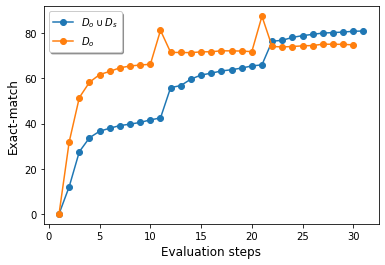

-------------------------------
------- Metric: BATCH_F1 --------
------------------------------


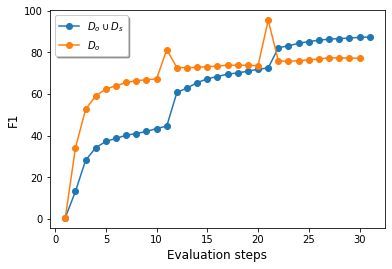

-------------------------------
------- Metric: VAL_F1 --------
------------------------------


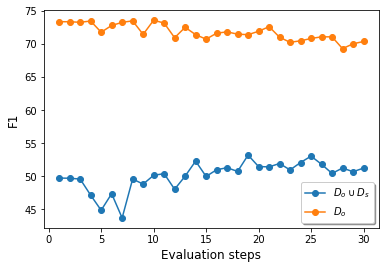

-------------------------------
------- Metric: VAL_ACC --------
------------------------------


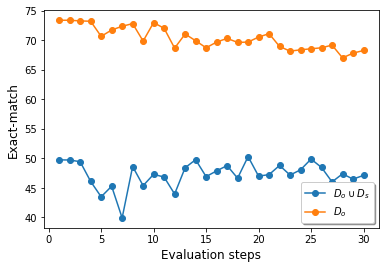

-------------------------------
------- Metric: VAL_LOSS --------
------------------------------


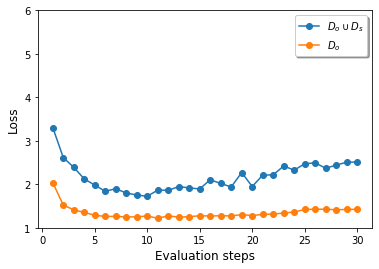

In [25]:
for i in range(len(models)):
    print('------------------------------')
    print('------- Model: {} --------'.format(models[i].upper()))
    print('------------------------------')
    print()
    for j in range(len(metrics)):
        print('-------------------------------')
        print('------- Metric: {} --------'.format(metrics[j].upper()))
        print('------------------------------')
        plot_results(all_results, metric=metrics[j], iv=iv,  model=models[i], task_setting=task_setting)